In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import pandas as pd
from glob import glob

In [2]:
import os

# Adjust the path based on actual folder location
fake_folder = '/kaggle/input/final-dataset/final_dataset/Celeb-synthesis'
real_folder = '/kaggle/input/final-dataset/final_dataset/Celeb-real'

# Check if paths exist
print("Fake folder exists:", os.path.exists(fake_folder))
print("Real folder exists:", os.path.exists(real_folder))

Fake folder exists: True
Real folder exists: True


In [3]:
from glob import glob

fake_videos = sorted(glob(os.path.join(fake_folder, '*.mp4')))
real_videos = sorted(glob(os.path.join(real_folder, '*.mp4')))

print("Number of fake videos:", len(fake_videos))
print("Number of real videos:", len(real_videos))

Number of fake videos: 432
Number of real videos: 428


In [ ]:
all_videos =  real_videos+fake_videos
labels = [0]*len(real_videos) + [1]*len(fake_videos)  # 1 = Fake, 0 = Real

# Example:
for video, label in zip(all_videos, labels):
    print(f"{video} -> {'Fake' if label == 1 else 'Real'}")

In [5]:
frame_count = []
for video_file in all_videos:
  cap = cv2.VideoCapture(video_file)
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [306, 312, 201, 274, 269, 298, 327, 335, 320, 337, 323, 322, 338, 328, 324, 341, 315, 306, 311, 337, 325, 324, 328, 347, 338, 334, 234, 262, 334, 178, 225, 165, 359, 317, 322, 319, 199, 310, 283, 273, 312, 365, 333, 333, 325, 332, 318, 309, 319, 186, 307, 308, 314, 306, 308, 316, 292, 315, 317, 319, 321, 337, 339, 308, 323, 310, 243, 342, 341, 250, 327, 309, 315, 321, 323, 315, 355, 327, 320, 322, 249, 350, 336, 307, 338, 318, 334, 317, 288, 340, 283, 307, 1, 295, 331, 331, 311, 330, 333, 310, 332, 311, 332, 323, 301, 342, 331, 429, 310, 434, 344, 364, 468, 472, 306, 450, 474, 504, 451, 465, 470, 404, 448, 366, 456, 497, 479, 423, 369, 485, 467, 465, 349, 365, 455, 461, 475, 516, 571, 494, 448, 428, 431, 464, 457, 473, 479, 441, 446, 452, 490, 417, 376, 266, 503, 504, 455, 480, 419, 322, 394, 472, 478, 441, 470, 516, 485, 487, 508, 380, 454, 256, 295, 228, 399, 209, 321, 416, 427, 456, 448, 468, 478, 470, 482, 463, 307, 502, 290, 458, 353, 370, 458, 454, 473, 483, 473, 466,

In [6]:
output_video_folder = "/kaggle/working/output_videos"
os.makedirs(output_video_folder, exist_ok=True)

label_file_path = os.path.join(output_video_folder, "labels.csv")
label_entries = []


In [7]:
!pip install facenet-pytorch --no-deps --quiet



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.3 MB/s eta 0:00:0000:010:01


In [8]:
import os
import cv2

def filter_and_trim_videos(video_path, output_folder, label, required_frames=150):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    video_name = os.path.splitext(os.path.basename(video_path))[0]

    # Only process if video has at least required_frames
    if total_frames < required_frames:
        cap.release()
        print(f"Skipping {video_name}: only {total_frames} frames (< {required_frames})")
        return None

    frames = []
    for i in range(required_frames):
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)

    cap.release()

    if len(frames) < required_frames:
        print(f"Skipping {video_name}: could not read {required_frames} frames")
        return None

    # Determine frame size from first frame
    if frames:
        height, width = frames[0].shape[:2]
        size = (width, height)
    else:
        print(f"Skipping {video_name}: empty frame list")
        return None

    # Save trimmed video
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, f"{video_name}.mp4")
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, 25.0, size)

    for frame in frames:
        out.write(frame)
    out.release()

    print(f"Saved trimmed video: {output_path}")
    return video_name, label


In [ ]:
from tqdm import tqdm
import cv2
import os
from glob import glob
import os
from tqdm import tqdm

fake_folder = '/kaggle/input/final-dataset/final_dataset/Celeb-synthesis'
real_folder = '/kaggle/input/final-dataset/final_dataset/Celeb-real'

fake_videos = sorted(glob(os.path.join(fake_folder, '*.mp4')))
real_videos = sorted(glob(os.path.join(real_folder, '*.mp4')))

all_video_paths = [(path, 1) for path in fake_videos] + [(path, 0) for path in real_videos]

output_video_folder = '/kaggle/working/trimmed_videos'
label_entries = []

# --- Make sure output_video_folder exists before the loop ---
# This is crucial, as os.path.join won't create the directory.
os.makedirs(output_video_folder, exist_ok=True)

for path, label in tqdm(all_video_paths):
    try:
        # filter_and_trim_videos should return the filename (e.g., 'id20_id35_0009.mp4')
        # if it returns the full path, you'll need to adjust how you construct full_video_path
        result = filter_and_trim_videos(path, output_video_folder, label, required_frames=150)
        
        if result:
            video_filename, processed_label = result # Unpack the result. Renamed `label` to `processed_label` to avoid confusion with loop's `label`
            
            # Construct the full path to the output video
            full_video_path = os.path.join(output_video_folder, video_filename)
            
            # Append the full path and the label
            label_entries.append((full_video_path, processed_label))
            
    except Exception as e:
        print(f"\nError processing video: {path}")
        print(f"Error details: {e}")
        continue


In [10]:
df_labels = pd.DataFrame(label_entries, columns=['video_name', 'label'])
df_labels.to_csv(label_file_path, index=False)

In [11]:
df_labels = df_labels.drop_duplicates()
df_labels = df_labels.reset_index(drop=True)


In [12]:
X=df_labels['video_name']
y=df_labels['label']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [ ]:
X_train
X_train = X_train.apply(lambda x: str(x) + ".mp4")

In [ ]:
X_train


In [15]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize((112, 112)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.Resize((112, 112)),   # Ensure same spatial size
    transforms.ToTensor(),           # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Same normalization as training
                         std=[0.229, 0.224, 0.225])
])


In [16]:
df_labels['video_name'] = df_labels['video_name'].apply(lambda x: str(x) + ".mp4")

print("\ndf_labels['video_name'] AFTER adding .mp4:")
print(df_labels['video_name'].head())


# --- Step 2: Now, create your dictionary using the corrected df_labels ---
video_label_dict = dict(zip(df_labels['video_name'], df_labels['label']))


df_labels['video_name'] AFTER adding .mp4:
0    /kaggle/working/trimmed_videos/id20_id35_0002.mp4
1    /kaggle/working/trimmed_videos/id20_id35_0003.mp4
2    /kaggle/working/trimmed_videos/id20_id35_0004.mp4
3    /kaggle/working/trimmed_videos/id20_id35_0005.mp4
4    /kaggle/working/trimmed_videos/id20_id35_0006.mp4
Name: video_name, dtype: object


In [ ]:
video_label_dict

In [17]:
!pip install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 17.3 MB/s eta 0:00:00:00:010:01
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=e001e359653c94d3c2c3e8e4334d6e846dcd2f2decc12efcd24fcf4039582497
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [23]:
import torch
from torch.utils.data import Dataset
import cv2
import os
import numpy as np
from torchvision import transforms
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt

class VideoDataSet(Dataset):
    def __init__(self, video_paths, label_dict, num_frames=10, frame_stride=20, transform=None, device='cpu', debug=False): # device is not used in this class
        self.video_paths = video_paths
        self.label_dict = label_dict
        self.num_frames = num_frames
        self.frame_stride = frame_stride
        self.transform = transform
        self.debug = debug
        # self.device = device # device parameter was not used

    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, index):
        path = self.video_paths[index]
        
        label = self.label_dict.get(path, -1)

        frames_tensor_list = self.extract_and_process_frames(path, debug=self.debug, index=index)

        # If no frames found, pad with dummy tensors
        if len(frames_tensor_list) == 0:
            dummy = torch.zeros((3, 112, 112)) # Assuming 3 channels, 112x112 size
            frames_tensor_list = [dummy] * self.num_frames

        # Pad if fewer than expected
        while len(frames_tensor_list) < self.num_frames:
            frames_tensor_list.append(frames_tensor_list[-1].clone()) # Pad with the last valid frame

        video_tensor = torch.stack(frames_tensor_list)
        return video_tensor, label

    def extract_and_process_frames(self, path, debug=False, index=0):
        cap = cv2.VideoCapture(path)
        if not cap.isOpened():
            print(f"Error: Could not open video {path}")
            return []
            
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        processed_frames_tensors = []

        for i in range(self.num_frames):
            frame_idx = i * self.frame_stride
            if frame_idx >= total_frames:
                break

            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
            success, frame = cap.read()
            if not success:
                # print(f"Warning: Failed to read frame {frame_idx} from video {path}") # Optional warning
                continue

            # Convert BGR to RGB
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Detect faces (face_recognition returns list of (top, right, bottom, left))
            face_locations = face_recognition.face_locations(rgb_frame)

            pil_image_to_transform: Image.Image # This will be the PIL image (face or full frame)

            if len(face_locations) == 0:
                # No face found, use whole resized frame as fallback
                pil_img = Image.fromarray(rgb_frame)
                pil_image_to_transform = pil_img.resize((112, 112))
                
                if debug:
                    print(f"[Warning] No face detected at frame {frame_idx} in video index {index} (path: {os.path.basename(path)})")
                    # Plot the image as it was in the original code for this specific "no face" debug case:
                    # i.e., resized PIL image converted to tensor, before any self.transform.
                    temp_tensor_for_plot = transforms.ToTensor()(pil_image_to_transform)
                    self.plot_image(temp_tensor_for_plot, index, frame_idx, "No Face Fallback")
            else:
                # Use first detected face
                top, right, bottom, left = face_locations[0]
                # Ensure coordinates are within image bounds, although face_recognition should handle this.
                top = max(0, top)
                left = max(0, left)
                bottom = min(rgb_frame.shape[0], bottom)
                right = min(rgb_frame.shape[1], right)
                
                face_crop = rgb_frame[top:bottom, left:right]

                if face_crop.size == 0: # Check if crop is empty
                    # Fallback if face crop is empty for some reason (e.g., invalid coordinates)
                    pil_img = Image.fromarray(rgb_frame)
                    pil_image_to_transform = pil_img.resize((112, 112))
                    if debug:
                        print(f"[Warning] Empty face crop at frame {frame_idx} in video index {index}, using full frame. (path: {os.path.basename(path)})")
                        temp_tensor_for_plot = transforms.ToTensor()(pil_image_to_transform)
                        self.plot_image(temp_tensor_for_plot, index, frame_idx, "Empty Crop Fallback")
                else:
                    # Convert to PIL Image and resize
                    pil_image_to_transform = Image.fromarray(face_crop).resize((112, 112))

            # Apply user-defined transforms (expected to take PIL Image and output Tensor)
            # or default ToTensor if no transform is provided.
            final_tensor_frame: torch.Tensor
            if self.transform:
                final_tensor_frame = self.transform(pil_image_to_transform)
            else:
                final_tensor_frame = transforms.ToTensor()(pil_image_to_transform)

            # Visual debug plot for the first frame of the first few samples (shows final processed tensor)
            if debug and i == 0 and index < 3:
                # This plots the frame after self.transform (or default ToTensor)
                # It might replot if "no face" debug also plotted, but this shows the *final* tensor.
                self.plot_image(final_tensor_frame, index, frame_idx, "Processed Frame")

            processed_frames_tensors.append(final_tensor_frame)

        cap.release()
        return processed_frames_tensors

    def plot_image(self, image_tensor, video_index, frame_index, title_prefix=""):
        # Ensure tensor is on CPU and is a float
        npimg = image_tensor.cpu().float().permute(1, 2, 0).numpy()
        
        # Normalize for display (handles tensors that are [0,1] or normalized with mean/std)
        min_val = npimg.min()
        max_val = npimg.max()
        if max_val - min_val > 1e-5: # Avoid division by zero/small range
            npimg = (npimg - min_val) / (max_val - min_val)
        npimg = np.clip(npimg, 0, 1) # Clip to [0,1] range

        plt.imshow(npimg)
        plt.title(f'{title_prefix} - Video #{video_index + 1} - Frame {frame_index}')
        plt.axis('off')
        plt.show()

In [ ]:
# Create your dataset
X_train_dataset = VideoDataSet(X_train, video_label_dict, num_frames=10, transform=train_transform, debug=True)

# Get the 0th video and its label
video_tensor, label = X_train_dataset[65]

# Pick a specific frame (e.g., 5th frame, index 4)
frame_to_plot = video_tensor[4]

# Call the method using the correct dataset object
X_train_dataset.plot_image(frame_to_plot, video_index=34, frame_index=9)



In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(X_train_dataset, batch_size=4, shuffle=True)

for videos, labels in train_loader:
    print("Batch video tensor shape:", videos.shape)
    print("Batch labels:", labels)


In [18]:
import torch
import torch.nn as nn
import torchvision.models as models

class DeepfakeModel(nn.Module):
    def __init__(self, num_classes=2, latent_dim=2048, lstm_layers=1, hidden_dim=2048, bidirectional=True):
        super(DeepfakeModel, self).__init__()

        # Load pretrained ResNeXt50 and remove last two layers
        model = models.resnext50_32x4d(pretrained=True)                                                       #Loads a pre-trained ResNeXt-50 model
        self.model = nn.Sequential(*list(model.children())[:-2])                                              #Extracts all layers except the last two (typically the classification head) to use as a feature extractor.
        self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers, bidirectional)
        self.relu = nn.LeakyReLU()                                                                            #Initializes a Leaky ReLU activation function
        self.dp = nn.Dropout(0.4)                                                                             #Adds a dropout layer with a rate of 0.4 to help prevent overfitting by randomly zeroing out 40% of the neurons during training.
        self.linear1 = nn.Linear(2048, num_classes)                                                           #Defines a fully connected layer that maps the LSTM output to the number of classes (2 classes: fake and real).
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        
    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape                                                             #c=no. of channels (3-RGB) (h*w=112*112)
        x = x.view(batch_size * seq_length, c, h, w)                                                          #Reshapes the input tensor x to (batch_size * seq_length, channels, height, width), allowing each frame to be processed individually by the CNN.
        fmap = self.model(x)                                                                                  #Passes the reshaped input through the ResNeXt model to extract feature maps.
        x = self.avgpool(fmap)                                                                                #Applies adaptive average pooling to reduce spatial dimensions to 1x1.
        x = x.view(batch_size, seq_length, 2048)                                                              #Reshapes the pooled output to (batch_size, seq_length, 2048), making it suitable for input to the LSTM.
        x_lstm, _ = self.lstm(x, None)                                                                        #Passes the input tensor through the LSTM layer, initializing the hidden state to zeros; 'x_lstm' contains the LSTM output for each time step and output of hidden state is ignored(_).
        return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1))) 


        


In [19]:
model = DeepfakeModel(num_classes=2)
model.load_state_dict(torch.load("/kaggle/input/deepfake/pytorch/default/1/model_weights.pth", map_location=torch.device('cpu')))
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 196MB/s]


DeepfakeModel(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
     

In [28]:
def test_model(model, test_loader, device):
    import torch
    import torch.nn as nn
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    model = model.to(device)
    model.eval()

    class_weights = torch.tensor([1.0, 5.0]).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)

    total_correct = 0
    total_samples = 0
    total_loss = 0.0

    all_preds = []
    all_labels = []
    accuracies = []  # Store running accuracy for plotting
    batch_indices = []  # Store batch numbers

    with torch.no_grad():
        for batch_idx, (videos, labels) in enumerate(test_loader):
            videos = videos.to(device)
            labels = labels.to(device).long()

            _, outputs = model(videos)

            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, dim=1)

            batch_correct = (preds == labels).sum().item()
            total_correct += batch_correct
            total_samples += labels.size(0)
            total_loss += loss.item()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            batch_accuracy = batch_correct / labels.size(0)
            running_accuracy = total_correct / total_samples

            accuracies.append(running_accuracy * 100)  # Convert to %
            batch_indices.append(batch_idx + 1)

            print(f"Test Batch {batch_idx+1}: Loss={loss.item():.4f}, "
                  f"Batch Acc={batch_accuracy*100:.2f}%, "
                  f"Running Acc={running_accuracy*100:.2f}%")

    if total_samples == 0:
        print("No samples found in test loader.")
        return

    avg_loss = total_loss / len(test_loader)
    final_accuracy = total_correct / total_samples

    print(f"\nAverage Loss: {avg_loss:.4f}")
    print(f"Final Test Accuracy: {final_accuracy*100:.2f}%")

    # Plot 1: Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot 2: Accuracy vs Batch number
    plt.figure(figsize=(8, 5))
    plt.plot(batch_indices, accuracies, marker='o', color='green', linestyle='--')
    plt.xlabel('Batch Number')
    plt.ylabel('Running Accuracy (%)')
    plt.title('Running Accuracy vs Batch')
    plt.grid(True)
    plt.xticks(range(1, len(batch_indices) + 1, max(1, len(batch_indices) // 10)))  # dynamic ticks
    plt.ylim(0, 100)
    plt.show()


In [20]:
import re

X_test = X_test.apply(lambda x: re.sub(r'(\.mp4)+$', '', str(x)) + '.mp4')

In [21]:
X_test

0           /kaggle/working/trimmed_videos/id47_0005.mp4
1           /kaggle/working/trimmed_videos/id35_0007.mp4
2      /kaggle/working/trimmed_videos/id21_id29_0004.mp4
3       /kaggle/working/trimmed_videos/id21_id4_0002.mp4
4      /kaggle/working/trimmed_videos/id23_id29_0004.mp4
                             ...                        
167         /kaggle/working/trimmed_videos/id36_0003.mp4
168    /kaggle/working/trimmed_videos/id22_id20_0004.mp4
169    /kaggle/working/trimmed_videos/id23_id22_0000.mp4
170     /kaggle/working/trimmed_videos/id21_id6_0007.mp4
171         /kaggle/working/trimmed_videos/id55_0004.mp4
Name: video_name, Length: 172, dtype: object

In [26]:

X_test_dataset = VideoDataSet(X_test, video_label_dict, num_frames=10, transform=train_transform, debug=True)


Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 0, 0, 1])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 0, 1, 0])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 1, 0, 1])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([1, 1, 1, 1])


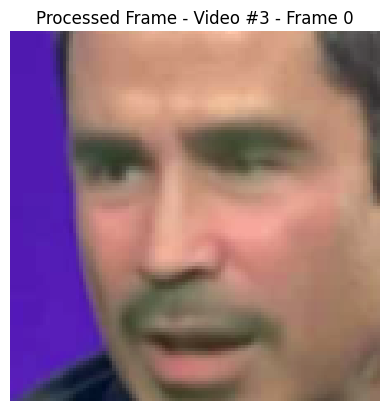

Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([1, 0, 1, 0])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 0, 1, 0])
[Warning] No face detected at frame 60 in video index 47 (path: id60_0006.mp4)


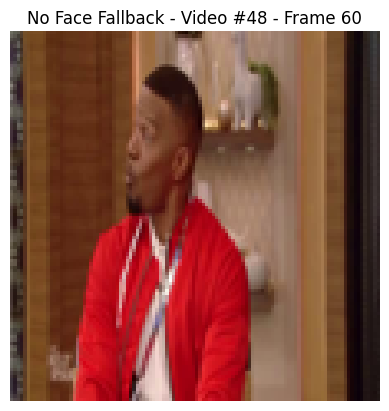

[Warning] No face detected at frame 80 in video index 47 (path: id60_0006.mp4)


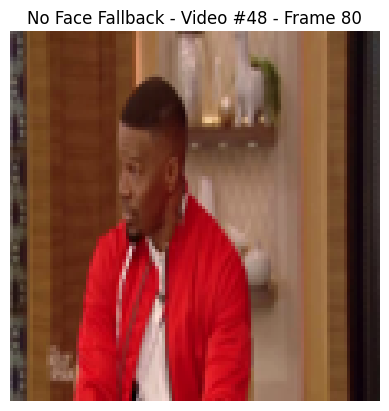

Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([1, 0, 1, 1])


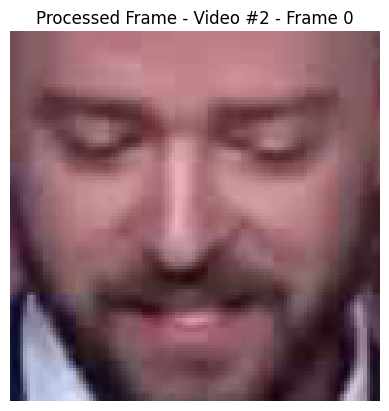

Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 0, 1, 0])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 0, 1, 1])


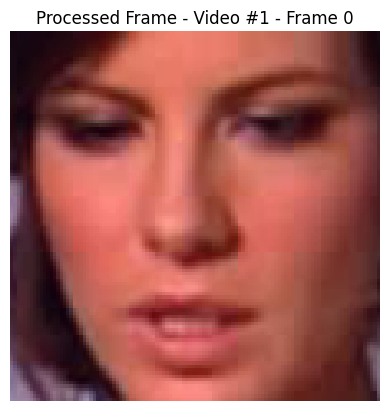

Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([1, 0, 1, 0])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([1, 0, 1, 1])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 1, 0, 0])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 0, 1, 0])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 1, 0, 0])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 0, 0, 1])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([1, 1, 0, 0])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 0, 1, 0])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([1, 0, 1, 1])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 1, 0, 1])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
B

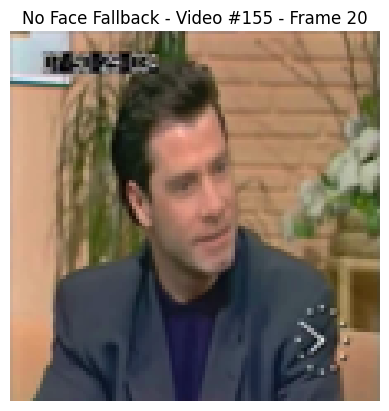

Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 1, 1, 1])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 0, 0, 0])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([1, 1, 0, 1])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([1, 0, 0, 1])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([1, 1, 0, 1])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([1, 0, 1, 1])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([1, 1, 1, 1])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 1, 1, 1])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([0, 1, 1, 1])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
Batch labels: tensor([1, 1, 0, 0])
Batch video tensor shape: torch.Size([4, 10, 3, 112, 112])
B

In [27]:
from torch.utils.data import DataLoader

test_loader = DataLoader(X_test_dataset, batch_size=4, shuffle=True)

# Get the first batch only
for videos, labels in test_loader:
    print("Batch video tensor shape:", videos.shape)  # e.g., torch.Size([4, C, T, H, W])
    print("Batch labels:", labels)                    # e.g., tensor([0, 1, 0, 1])
    


Test Batch 1: Loss=0.2316, Batch Acc=75.00%, Running Acc=75.00%
Test Batch 2: Loss=0.0076, Batch Acc=100.00%, Running Acc=87.50%
Test Batch 3: Loss=0.2760, Batch Acc=75.00%, Running Acc=83.33%
Test Batch 4: Loss=0.9528, Batch Acc=50.00%, Running Acc=75.00%
Test Batch 5: Loss=0.0047, Batch Acc=100.00%, Running Acc=80.00%
Test Batch 6: Loss=0.0114, Batch Acc=100.00%, Running Acc=83.33%
Test Batch 7: Loss=0.2549, Batch Acc=75.00%, Running Acc=82.14%
Test Batch 8: Loss=0.0153, Batch Acc=100.00%, Running Acc=84.38%
Test Batch 9: Loss=0.0075, Batch Acc=100.00%, Running Acc=86.11%
Test Batch 10: Loss=0.0204, Batch Acc=100.00%, Running Acc=87.50%
Test Batch 11: Loss=0.1170, Batch Acc=75.00%, Running Acc=86.36%
Test Batch 12: Loss=0.0024, Batch Acc=100.00%, Running Acc=87.50%
Test Batch 13: Loss=0.0052, Batch Acc=100.00%, Running Acc=88.46%
Test Batch 14: Loss=1.7571, Batch Acc=50.00%, Running Acc=85.71%
Test Batch 15: Loss=0.1345, Batch Acc=75.00%, Running Acc=85.00%
Test Batch 16: Loss=0.0280

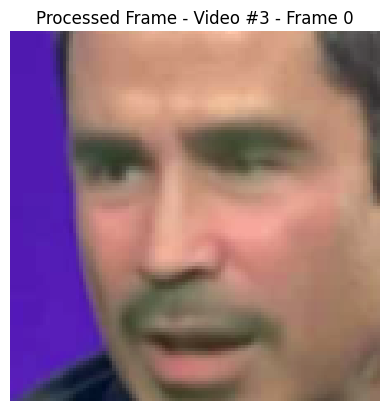

Test Batch 22: Loss=0.0178, Batch Acc=100.00%, Running Acc=86.36%
Test Batch 23: Loss=0.3019, Batch Acc=75.00%, Running Acc=85.87%
Test Batch 24: Loss=0.0029, Batch Acc=100.00%, Running Acc=86.46%


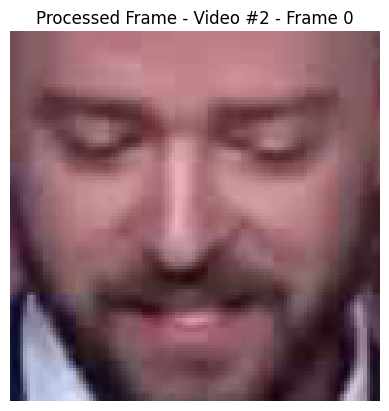

Test Batch 25: Loss=0.2701, Batch Acc=75.00%, Running Acc=86.00%
Test Batch 26: Loss=0.0172, Batch Acc=100.00%, Running Acc=86.54%
Test Batch 27: Loss=0.0298, Batch Acc=100.00%, Running Acc=87.04%
Test Batch 28: Loss=0.0247, Batch Acc=100.00%, Running Acc=87.50%
Test Batch 29: Loss=0.0145, Batch Acc=100.00%, Running Acc=87.93%
Test Batch 30: Loss=0.0998, Batch Acc=100.00%, Running Acc=88.33%
Test Batch 31: Loss=0.0215, Batch Acc=100.00%, Running Acc=88.71%
Test Batch 32: Loss=0.0498, Batch Acc=100.00%, Running Acc=89.06%
Test Batch 33: Loss=0.1114, Batch Acc=75.00%, Running Acc=88.64%
Test Batch 34: Loss=0.3951, Batch Acc=75.00%, Running Acc=88.24%
Test Batch 35: Loss=0.4258, Batch Acc=75.00%, Running Acc=87.86%
[Warning] No face detected at frame 60 in video index 47 (path: id60_0006.mp4)


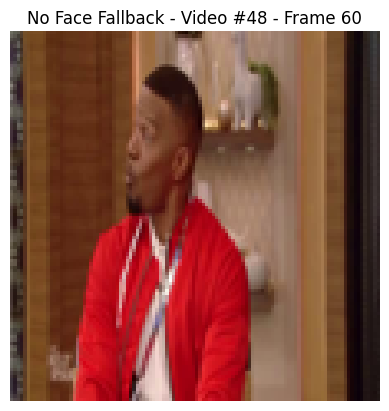

[Warning] No face detected at frame 80 in video index 47 (path: id60_0006.mp4)


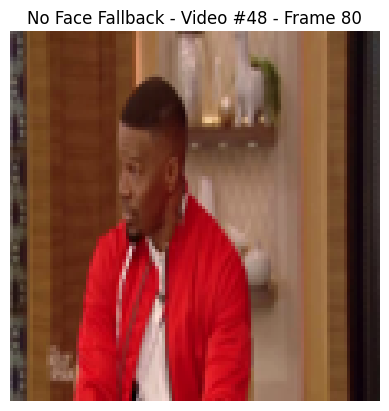

Test Batch 36: Loss=0.0067, Batch Acc=100.00%, Running Acc=88.19%
Test Batch 37: Loss=0.1909, Batch Acc=75.00%, Running Acc=87.84%
Test Batch 38: Loss=0.0111, Batch Acc=100.00%, Running Acc=88.16%
Test Batch 39: Loss=0.4142, Batch Acc=75.00%, Running Acc=87.82%
[Warning] No face detected at frame 20 in video index 154 (path: id21_id23_0009.mp4)


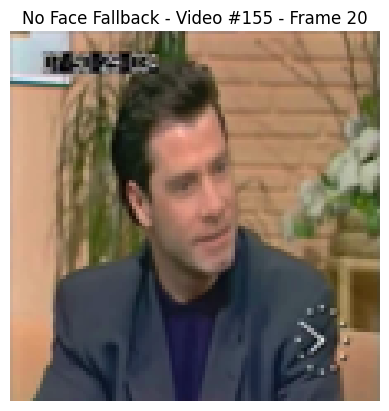

Test Batch 40: Loss=0.1802, Batch Acc=75.00%, Running Acc=87.50%


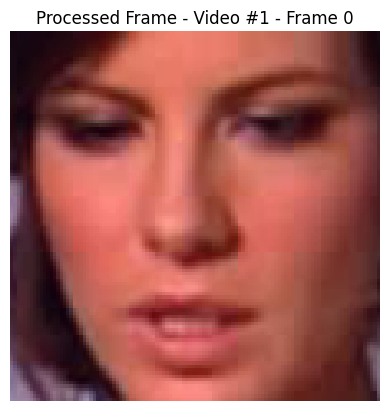

Test Batch 41: Loss=0.6907, Batch Acc=75.00%, Running Acc=87.20%
Test Batch 42: Loss=1.8034, Batch Acc=25.00%, Running Acc=85.71%
Test Batch 43: Loss=0.0109, Batch Acc=100.00%, Running Acc=86.05%

Average Loss: 0.2362
Final Test Accuracy: 86.05%


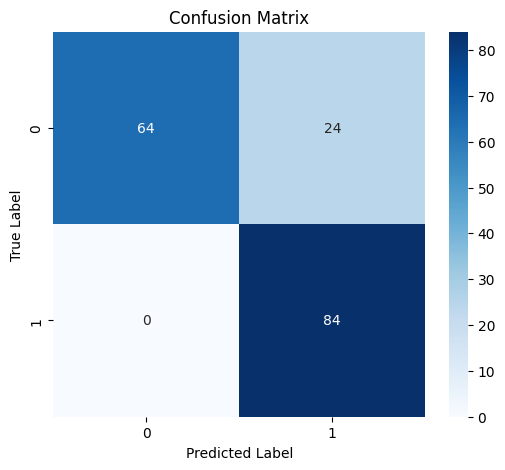

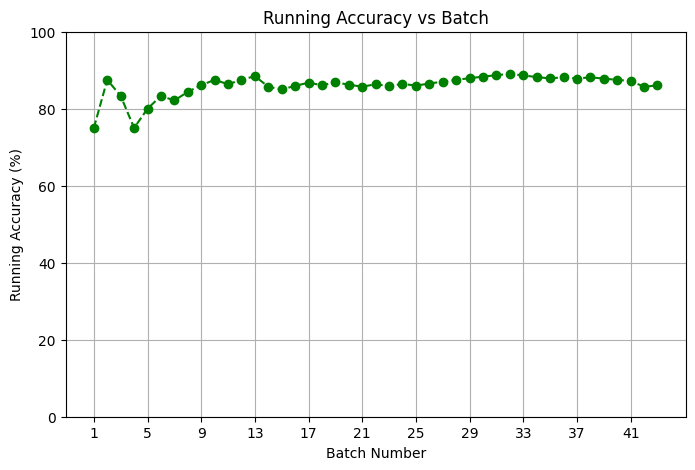

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_model(model,test_loader,device=device)